In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), "opencv_helper")))
from opencv_helper import helper

(480, 640)


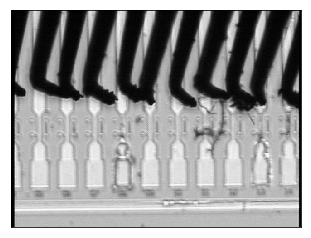

In [2]:
img_name = "inputs/5.png"
origin = cv2.imread(img_name, 1)
img = cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)
print(img.shape)
helper.show_img(img)

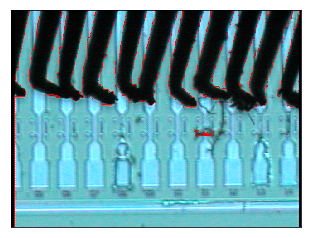

In [3]:
seg_img = helper.watershed(origin)
helper.show_img(seg_img)

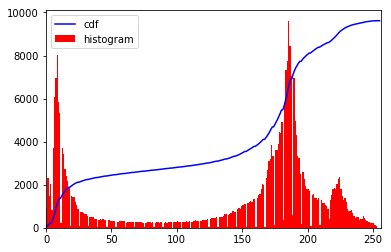

In [4]:
helper.histogram(img)

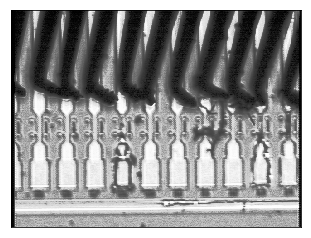

In [6]:
equ = cv2.equalizeHist(img)
helper.show_img(equ)

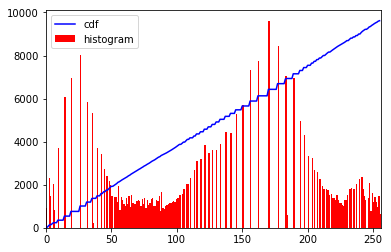

In [8]:
helper.histogram(equ)

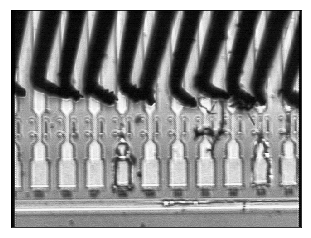

In [10]:
# contrast limited adaptive histogram equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl1 = clahe.apply(img)
helper.show_img(cl1)

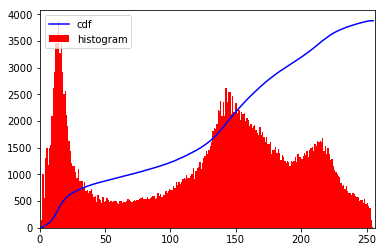

In [12]:
helper.histogram(cl1)

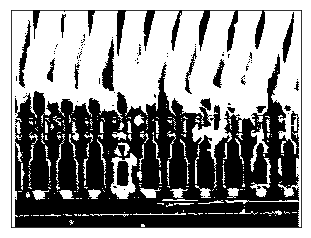

In [14]:
ret, thresh = cv2.threshold(equ, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
helper.show_img(thresh)

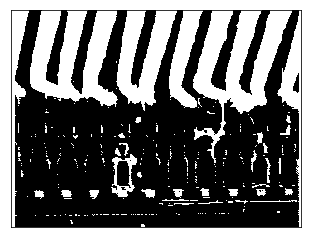

In [15]:
ret, thresh2 = cv2.threshold(cl1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
helper.show_img(thresh2)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

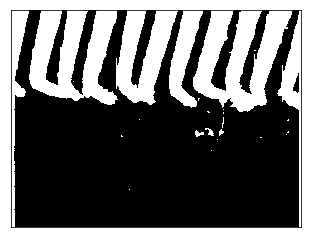

In [16]:
ret, after_thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
helper.show_img(after_thresh)
after_thresh

(480, 640)


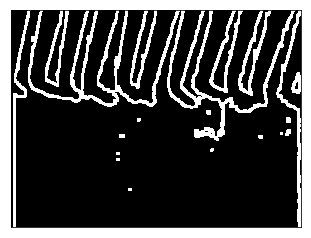

In [22]:
kernel = np.ones( (3,3), np.uint8)
sure_bg = cv2.dilate(after_thresh, kernel, iterations=3)
sure_fg = cv2.erode(after_thresh, kernel, iterations=3)
unknown = cv2.subtract(sure_bg, sure_fg)
helper.show_img(unknown)
print(unknown.shape)

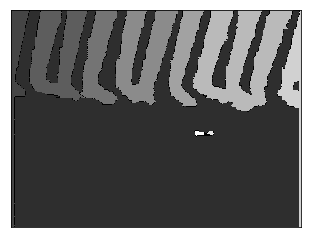

In [23]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown==255] = 0
markers = cv2.watershed(origin, markers)
helper.show_img(markers)

(480, 640)
(480, 640)


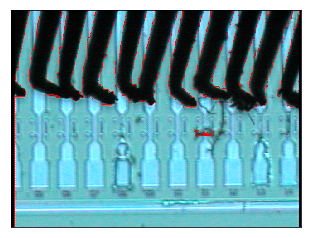

In [25]:
print(markers.shape)
print(img.shape)
origin[markers == -1] = [255, 0, 0]
helper.show_img(origin)

(<matplotlib.axes._subplots.AxesSubplot at 0x11f78f160>,
 <matplotlib.image.AxesImage at 0x11fa84908>)

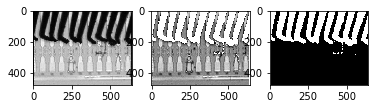

In [26]:
chip = img.copy()
chip[after_thresh == 255] = 255
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.subplot(132), plt.imshow(chip, cmap='gray')
plt.subplot(133), plt.imshow(after_thresh, cmap='gray')

In [ ]:
print(markers.dtype)
print(img.dtype)
print(unknown.dtype)

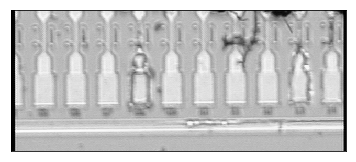

In [28]:
roi = img[:][210:]
helper.show_img(roi)

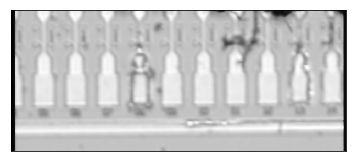

In [30]:
roi_blur = cv2.bilateralFilter(roi, 9, 75, 75)
helper.show_img(roi_blur)

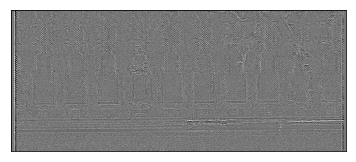

In [31]:
lap2 = cv2.Laplacian(roi, cv2.CV_64F)
helper.show_img(lap2)

In [32]:
helper.show_img(sobel_gradient(roi))

NameError: name 'sobel_gradient' is not defined

In [ ]:
# image gradient
laplacian = cv2.Laplacian(img, cv2.CV_8U)
show_img(laplacian)

In [ ]:
lap2 = cv2.Laplacian(img, cv2.CV_64F)
abs_lap2 = np.absolute(lap2)
lap2_8u = np.uint8(abs_lap2)
show_img(lap2_8u)

In [ ]:
sobelx = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=5)
show_img(sobelx)

In [ ]:
def sobel_gradient(img):
#     sobelx = cv2.Sobel(roi, cv2.CV_64F, 1, 0, ksize=5)
#     abs_sobelx = np.absolute(sobelx)
#     sobelx_8u = np.uint8(abs_sobelx)
    sobelx_8u = cv2.Sobel(roi, cv2.CV_8U, 1, 0, ksize=5)
    return sobelx_8u

In [ ]:
show_img(sobel_gradient(roi))

In [ ]:
canny_edges = cv2.Canny(roi, 50, 150)
show_img(canny_edges)

In [ ]:
hough_lines(sobelx)

In [ ]:
def hough_lines(img):
    lines = cv2.HoughLines(img, 1, np.pi/180, 500)
    print("total lines: ", len(lines))
    for rho, theta in lines[0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        print(rho, theta, x0,y0)
        x1 = int(x0 + 240 * (-b))
        y1 = int(y0 + 240 * (-b))
        x2 = int(x0 - 240 * (-b))
        y2 = int(y0 - 240 * (-b))
        print(x1, y1, x2, y2)

        cv2.line(img, (x1,y1), (x2, y2), (0, 0, 255), 2)

    show_img(img)

In [ ]:
sobely = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=5)
show_img(sobely)

In [ ]:
# edges = cv2.Canny(img, 75, 150, apertureSize=3)
# lines = cv2.HoughLines(edges, 1, np.pi/180, 20)
lines = cv2.HoughLines(img, 1, np.pi/180, 500)
print("total lines: ", len(lines))
for rho, theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    print(rho, theta, x0,y0)
    x1 = int(x0 + 240 * (-b))
    y1 = int(y0 + 240 * (-b))
    x2 = int(x0 - 240 * (-b))
    y2 = int(y0 - 240 * (-b))
    print(x1, y1, x2, y2)
    
    cv2.line(img, (x1,y1), (x2, y2), (0, 0, 255), 2)

show_img(img)

In [ ]:
print(img.dtype)
print(img.size)
print(img.shape)

In [ ]:
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
show_img(img)